In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [29]:
res = pd.read_csv("time/times.csv")


In [30]:
res.head()

,execTime,Q1total,Q1postRead,Q2total,Q2postRead,Q3APItotal,Q3APIpostRead,Q3RDDtotal,Q3RDDpostRead,Q4total,Q4postRead,Q5total,Q5postRead
0,2022-12-05 16:12:54.683631,19.704653,10.763800,12.636370,8.213480,13.373835,8.959898,53.830495,53.785581,16.734976,12.203792,21.206742,16.985536
1,2022-12-05 16:42:54.711275,14.196103,9.528182,12.097590,7.820158,13.133492,8.778432,53.336779,53.315608,15.649253,11.225047,20.769389,16.447132
2,2022-12-05 17:12:54.801442,13.634023,9.138589,11.395861,7.138965,12.752657,8.278484,53.902633,53.883040,16.275084,11.951972,21.270762,16.817474
3,2022-12-05 17:42:54.901519,13.918021,9.182426,12.178711,7.741117,13.033265,8.755395,54.402882,54.376927,16.755606,12.395446,20.629254,16.175179
4,2022-12-05 18:12:55.001658,15.381623,9.220688,11.783943,7.491838,13.063667,8.597147,53.265701,53.248776,17.294991,12.886675,21.111930,16.719438


In [31]:
ress=res.drop(["execTime","Q1postRead","Q2postRead",'Q3APIpostRead',
    'Q3RDDpostRead',"Q4postRead","Q5postRead"],axis=1)
meant = ress.mean()
stdt = ress.std()
ress=res.drop(["execTime","Q1total","Q2total",'Q3APItotal',
    'Q3RDDtotal',"Q4total","Q5total"],axis=1)
meanar = ress.mean()
stdar = ress.std()


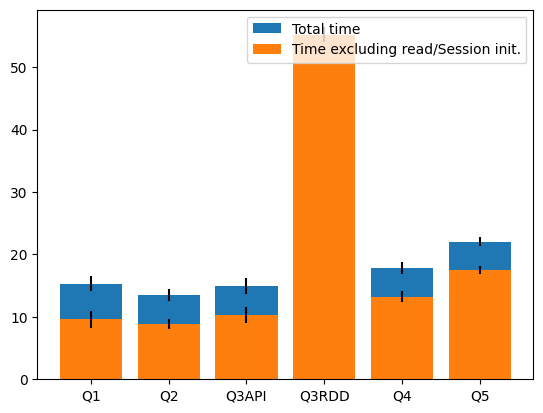

In [32]:
labels = ["Q1","Q2","Q3API","Q3RDD","Q4","Q5",]
plt.bar(labels,meant,yerr=stdt,label="Total time")
plt.bar(labels,meanar,yerr=stdar,label="Time excluding read/Session init.")
plt.legend()

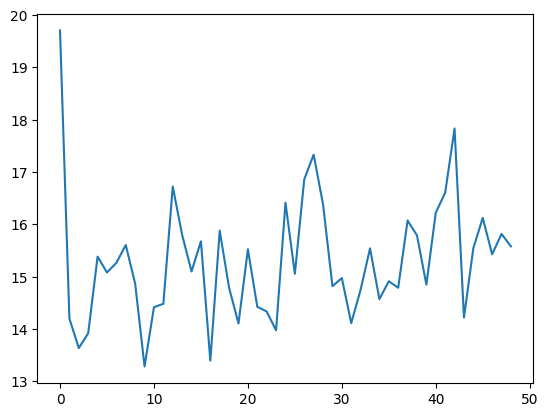

In [33]:
timestamps = res.execTime
Q1 = res.Q1total
plt.plot(Q1)

In [37]:
import datetime
hours = res.execTime.apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f").hour)
days = res.execTime.apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f").weekday())
res["hours"]=hours
res["days"]=days

In [38]:
byhour=res.drop(["execTime","days"],axis=1).groupby(res.hours).aggregate("mean")
byweekday = res.drop(["execTime","hours"],axis=1).groupby(res.days).aggregate("mean")


<BarContainer object of 24 artists>

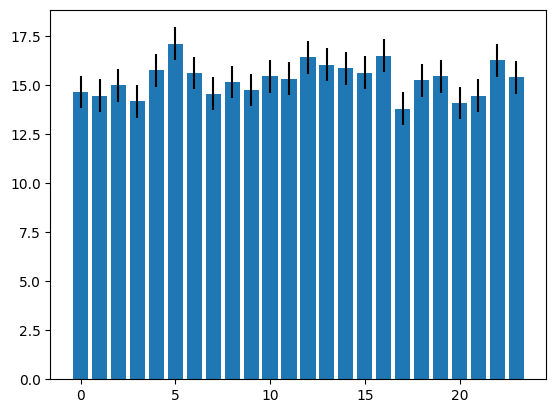

In [42]:
plt.bar(byhour.index,byhour.Q1total,yerr=byhour.Q1total.std())

<BarContainer object of 2 artists>

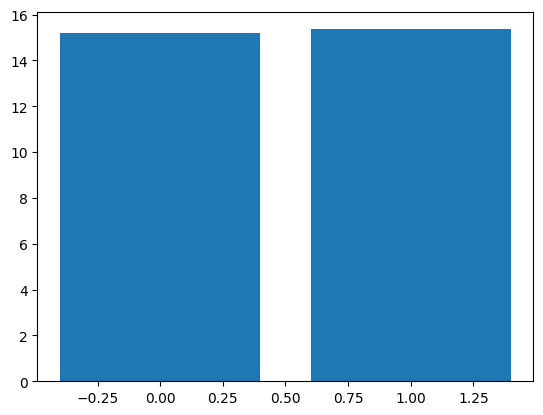

In [40]:
plt.bar(byweekday.index,byweekday.Q1total)